In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Dense
from keras.models import Model
import numpy as np
import pandas as pd
import os

In [66]:
# This can be used for CNN
def read_images(dir):
    # rescales images
    datagen = ImageDataGenerator(rescale=1./255)
    
    generator = datagen.flow_from_directory(
        dir,
        target_size = (150,150),
        batch_size = 20,
        class_mode = 'input',
        color_mode = 'rgb'
    )
    
    return(generator)

In [67]:
datasets = {
    'train': 'data/training', 
    'test': 'data/testing', 
    'valid': 'data/validation',}

key_to_generator = {k: read_images(v) for k,v in datasets.items()}

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [68]:
key_to_generator

{'train': <keras.preprocessing.image.DirectoryIterator at 0x631b71ba8>,
 'test': <keras.preprocessing.image.DirectoryIterator at 0x632a556a0>,
 'valid': <keras.preprocessing.image.DirectoryIterator at 0x631b65128>}

In [69]:
type(key_to_generator['train'])

keras.preprocessing.image.DirectoryIterator

image dimensions: (150, 150, 3)


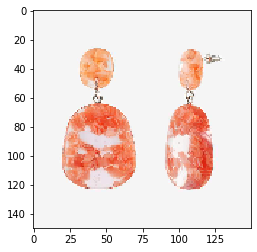

In [70]:
# show an earring
print(f'image dimensions: {key_to_generator["train"][1][0][2].shape}')
plt.imshow(key_to_generator['train'][0][0][0]);

In [82]:
# confirm the iterator works
batchX, batchy = key_to_generator["train"].next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

Batch shape=(20, 150, 150, 3), min=0.000, max=1.000


In [85]:
# dimensions of our images.
img_width, img_height = 150, 150
input_img = Input(shape=(22500,))
input_img

<tf.Tensor 'input_12:0' shape=(None, 22500) dtype=float32>